## PART I:
#### EDA & Data Preprocessing on Google App Store Rating Dataset

**1. Import required libraries and read the dataset.**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing required libraries

In [2]:
df = pd.read_csv('Apps_data.csv') #reading the dataset

**2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [3]:
df.head(10) #checking first few samples

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
df.shape #checking shape

(10841, 13)

There are total 10841 rows and 13 colums

In [5]:
df.info() #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.**

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Columns that need to be worked upon for model building:
- Category: Categorical variable representing the category of the app.
- Reviews: Numeric variable representing the number of reviews.
- Rating: Contains missing values.
- Size: Alphanumeric variable representing the size of the app.
- Installs: Alphanumeric variable representing the number of installs.
- Type: Categorical variable representing whether the app is free or paid.
- Price: Numeric variable representing the price of the app.
- Content Rating: Categorical variable representing the content rating of the app.
- Genres: Categorical variable representing the genre of the app

**4. Check if there are any duplicate records in the dataset? if any drop them.**

In [7]:
df.duplicated().sum() #checking for duplicate records

483

In [8]:
df.drop_duplicates(inplace=True) #deleting duplicate records

In [9]:
df.duplicated().sum()

0

**5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them**

In [10]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
df = df[df['Category'] != '1.9'] #dropping the invalid category

**6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [12]:
df['Rating'].isnull().sum()

1465

In [13]:
df.dropna(subset=['Rating'], inplace=True) #dropping null values in Rating column

In [14]:
df['Rating'].isnull().sum()

0

In [15]:
df['Rating_category'] = np.where(df['Rating'] > 3.5, 'High', 'Low')

In [16]:
df['Rating_category']

0        High
1        High
2        High
3        High
4        High
         ... 
10834    High
10836    High
10837    High
10839    High
10840    High
Name: Rating_category, Length: 8892, dtype: object

**7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.**

(array([8012.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  880.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  ]),
 <BarContainer object of 25 artists>)

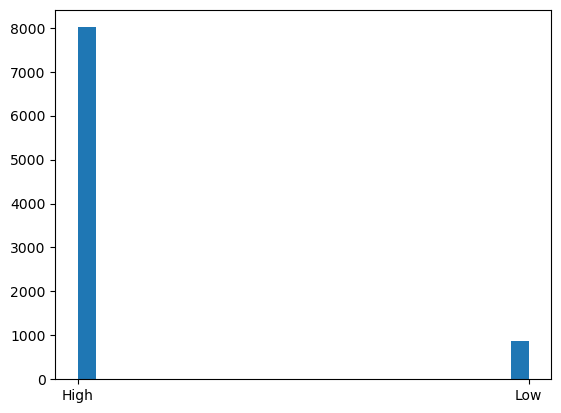

In [17]:
plt.hist(df['Rating_category'], bins=25) #checking distribution using histogram

In [18]:
df['Rating_category'].value_counts() #checking distribution 

Rating_category
High    8012
Low      880
Name: count, dtype: int64

There are total 8012 apps which have a rating of more than 3.5 and there are 880 apps with ratings less than 3.5

**8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.(Hint: Use log transformation)**

In [19]:
df['Reviews'] =  df['Reviews'].astype('int')

<Axes: >

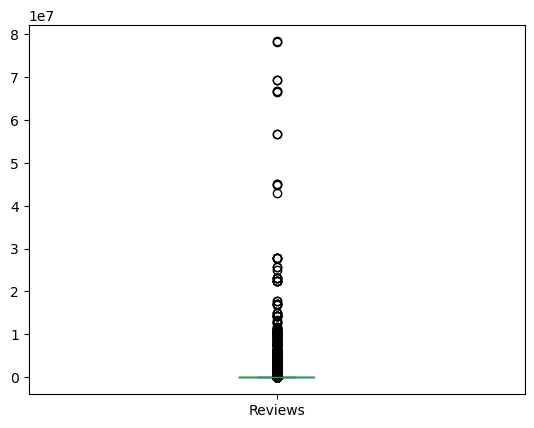

In [20]:
df['Reviews'].plot(kind = 'box') #checking 

In [21]:
df['Reviews'] = np.log1p(df['Reviews']) # handling outliers using log transformation

<Axes: >

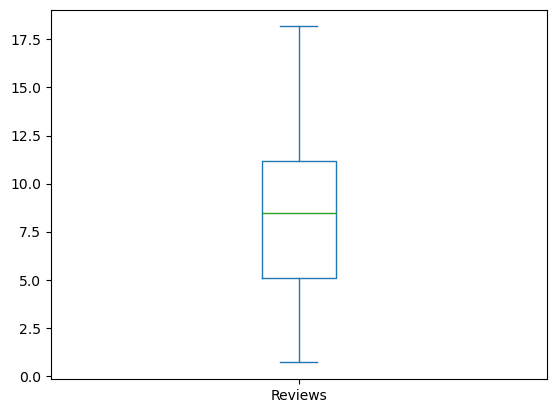

In [22]:
df['Reviews'].plot(kind = 'box')

**9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')**

In [23]:
df = (df[df['Size'] != 'Varies with device']) #dropping the values where size = varies with device

In [24]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', 'e+6') if 'M' in str(x) else x) #Replace M with 1 million
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k', 'e+3') if 'k' in str(x) else x) #Replace K with 1 thousand

**10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [25]:
df['Installs'] = df['Installs'].replace({"\+":"",",":""}, regex= True).astype('float')

**11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [26]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [27]:
df['Price'] = df['Price'].str.replace("$","").astype('float')

In [28]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

**12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [29]:
cols_to_drop = ['App', 'Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
df.drop(columns = cols_to_drop, inplace=True)

**13. Encode the categorical columns.**

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode categorical columns
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Content Rating'] = label_encoder.fit_transform(df['Content Rating'])
df['Rating_category'] = label_encoder.fit_transform(df['Rating_category'])

**14. Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [36]:
# Segregate the target and independent features (use Rating_category as the target)
X = df.drop(columns=['Rating_category'])
y = df['Rating_category']

**15. Split the dataset into train and test.**

In [37]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5196, 7) (2228, 7)
(5196,) (2228,)


**16. Standardize the data, so that the values are within a particular range.**

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
print(np.mean(X_train_scaled, axis=0))
print(np.std(X_train_scaled, axis=0))

[-8.88862160e-17  5.81179104e-17 -5.74341703e-17  9.57236172e-18
 -2.42727744e-17 -4.10244074e-18 -6.56390518e-17]
[1. 1. 1. 1. 1. 1. 1.]


The mean of each feature is close to 0, which is what we expect after standardization.
The standard deviation of each feature is close to 1, indicating that the data has been scaled to have a unit standard deviation.